In [33]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing import image
import keras.applications.mobilenet_v2 as mobilenetv2


In [34]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3
base_path = "./Data/garbage_classification/"
categories = ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 
            'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']

In [35]:
train = tf.keras.utils.image_dataset_from_directory(
    base_path,
    class_names=categories,
    image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    validation_split=0.2,
    subset="training",
    seed=123,
    batch_size=50
)
validate=tf.keras.utils.image_dataset_from_directory(
    base_path,
    class_names=categories,
    image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    validation_split=0.2,
    subset="validation",
    seed=123,
    batch_size=50
)

Found 15515 files belonging to 12 classes.
Using 12412 files for training.
Found 15515 files belonging to 12 classes.
Using 3103 files for validation.


In [36]:
model = tf.keras.models.load_model("Models/Premade-128")


In [45]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory
# tflite_model = converter.convert()
# with open('model.tflite', 'wb') as f:
#   f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/8h/r_p0xb3j6m57h6qffsf0kmp00000gn/T/tmpbfo_4sem/assets


INFO:tensorflow:Assets written to: /var/folders/8h/r_p0xb3j6m57h6qffsf0kmp00000gn/T/tmpbfo_4sem/assets
2023-02-12 14:00:26.643270: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-02-12 14:00:26.643286: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-02-12 14:00:26.644074: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/8h/r_p0xb3j6m57h6qffsf0kmp00000gn/T/tmpbfo_4sem
2023-02-12 14:00:26.674850: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-02-12 14:00:26.674872: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/8h/r_p0xb3j6m57h6qffsf0kmp00000gn/T/tmpbfo_4sem
2023-02-12 14:00:26.767787: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-02-12 14:00:26.798142: I tensorflow/cc/saved_model/load

In [37]:
class_names = train.class_names

(128, 128, 3)
2/2 [==============================] - 0s 87ms/step
(128, 128, 3)
2/2 [==============================] - 0s 75ms/step
(128, 128, 3)
2/2 [==============================] - 0s 74ms/step
(128, 128, 3)
2/2 [==============================] - 0s 73ms/step
(128, 128, 3)
2/2 [==============================] - 0s 119ms/step
(128, 128, 3)
2/2 [==============================] - 0s 78ms/step
(128, 128, 3)
2/2 [==============================] - 0s 90ms/step
(128, 128, 3)
2/2 [==============================] - 0s 86ms/step
(128, 128, 3)
2/2 [==============================] - 0s 71ms/step
['battery', 'battery', 'clothes', 'shoes', 'clothes', 'clothes', 'biological', 'green-glass', 'clothes']


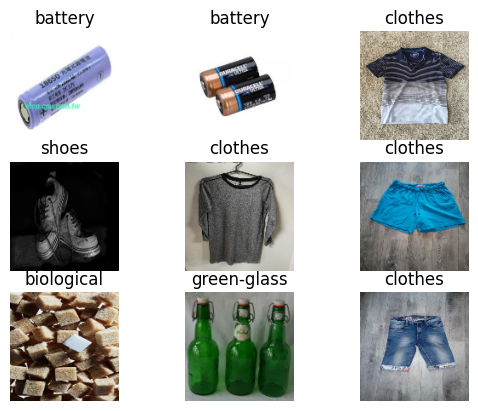

In [44]:
pred=[]
for images, labels in validate.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        print(images[i].numpy().shape)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        pred.append(categories[np.argmax(model.predict(images)[i])])
print(pred)